### Working with Text Data

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
weather = pd.read_csv('../data/weather_2012.csv', 
                           parse_dates=True, 
                           index_col='Date/Time')
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 549.0+ KB


In [3]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### String operations

You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great [examples](http://pandas.pydata.org/pandas-docs/stable/text.html) in the documentation.

In [4]:
weather_description = weather['Weather']
is_snowing = weather_description.str.contains('Snow')

This gives us a binary vector, which is a bit hard to look at, so we'll plot it.

In [5]:
# Not super useful
is_snowing.head()

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

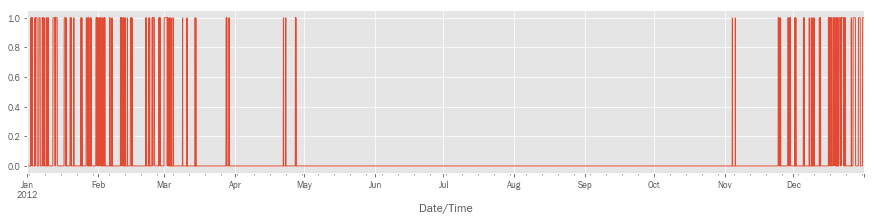

In [6]:
# More useful!
is_snowing.plot();

### Resample to find the snowiest month

If we wanted the median temperature each month, we could use the `resample()` method like this:

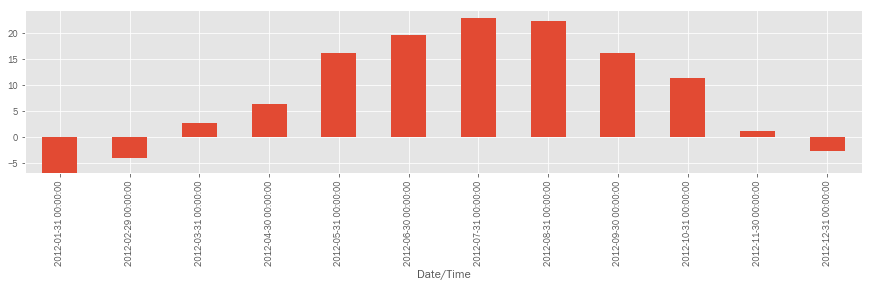

In [7]:
weather['Temp (C)'].resample('M').median().plot(kind='bar');

Unsurprisingly, July and August are the warmest.

So we can think of snowiness as being a bunch of 1s and 0s instead of `True`s and `False`s:

In [9]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

and then use `resample` to find the percentage of time it was snowing each month

In [10]:
is_snowing.astype(float).resample('M').mean()

Date/Time
2012-01-31    0.2406
2012-02-29    0.1624
2012-03-31    0.0874
2012-04-30    0.0153
2012-05-31    0.0000
2012-06-30    0.0000
2012-07-31    0.0000
2012-08-31    0.0000
2012-09-30    0.0000
2012-10-31    0.0000
2012-11-30    0.0389
2012-12-31    0.2513
Freq: M, Name: Weather, dtype: float64

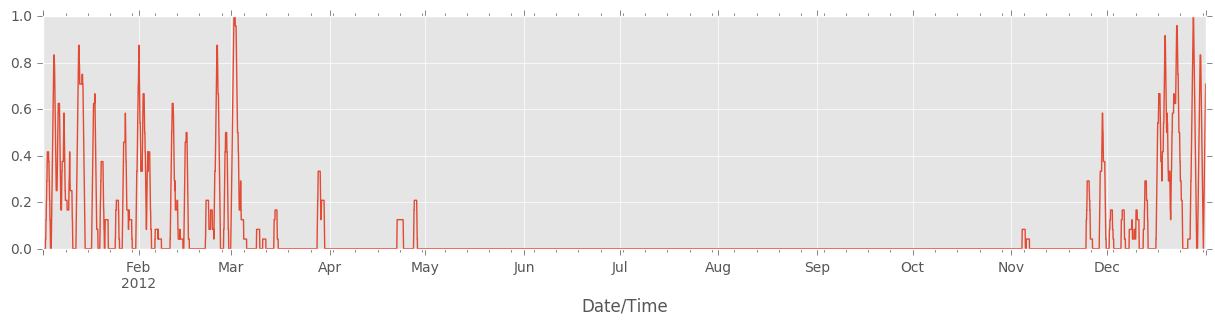

In [11]:
is_snowing.rolling(24).mean().dropna().plot();

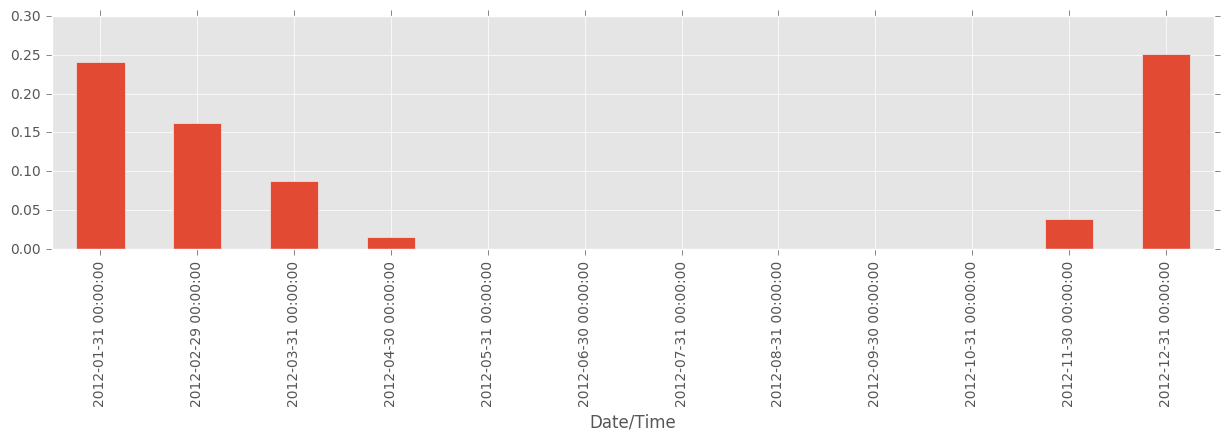

In [18]:
is_snowing.astype(float).resample('M').mean().plot(kind='bar');

So now we know! In 2012, December was the snowiest month. Also, this graph suggests something that I feel -- it starts snowing pretty abruptly in November, and then tapers off slowly and takes a long time to stop, with the last snow usually being in April or May.

### Plotting temperature and snowiness stats together

We can also combine these two statistics (temperature, and snowiness) into one dataframe and plot them together:

In [19]:
temperature = weather['Temp (C)'].resample('M').median()
is_snowing = weather['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M').mean()

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

We'll use `concat` again to combine the two statistics into a single dataframe.

In [20]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.2406
2012-02-29,-4.10,0.1624
2012-03-31,2.60,0.0874
2012-04-30,6.30,0.0153
2012-05-31,16.05,0.0000
2012-06-30,19.60,0.0000
2012-07-31,22.90,0.0000
2012-08-31,22.20,0.0000
2012-09-30,16.10,0.0000


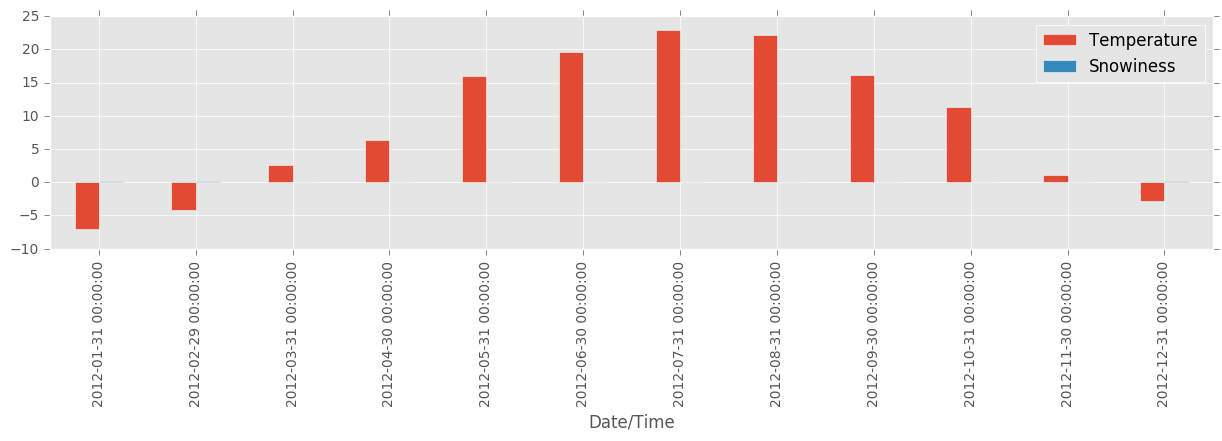

In [24]:
stats.plot(kind='bar');

Uh, that didn't work so well because the scale was wrong. We can do better by plotting them on two separate graphs:

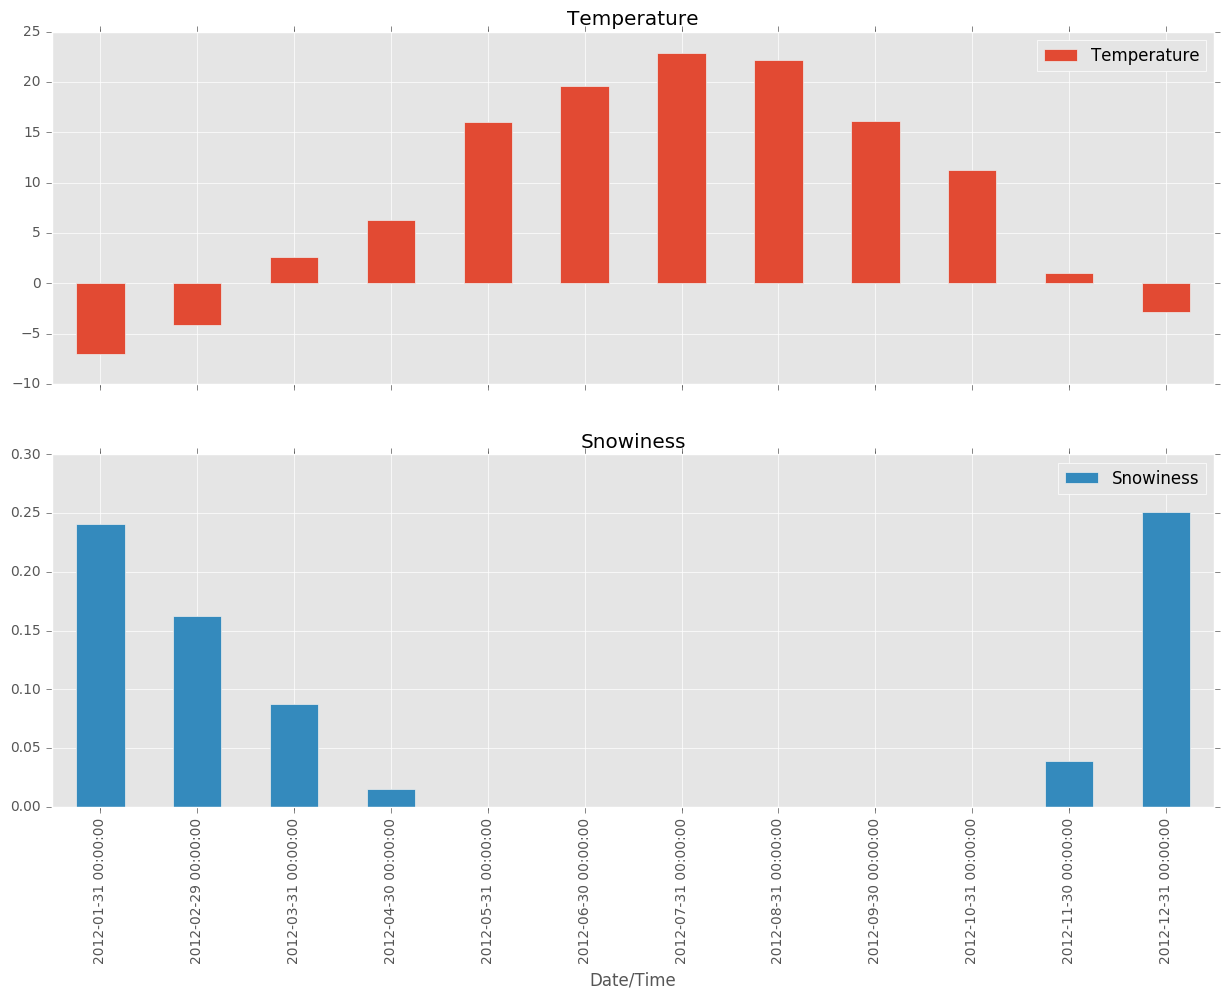

In [22]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10));

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  